#  FAST FOOD NUTRITION DATA ANALYSIS
Introduction

To analyze fast-food nutritional data in order to compare menu items across major fast-food chains and generate insights that support healthier and more informed food choices.
   







## Objective of the Project

The main goal of this project is to analyze fast-food nutritional data to understand:

● Nutritional differences across major fast-food chains

● Healthiest and unhealthiest menu items

● How calories, fat, cholesterol, carbohydrates, fiber, protein, sugar, and sodium vary across items

● How Weight Watchers Points relate to nutrition levels

● Patterns that can help customers make healthier choices

This analysis helps in understanding nutritional quality, comparing brands, and identifying trends that support better food decisions.

## About the Dataset
🔹Source URL:
Kaggle – https://www.kaggle.com/code/devraai/fast-food-nutrition-data-analysis-and-modeling/input

🔹Data Type:CSV (Comma Separated Values)

🔹Rows:1148 menu items

🔹Columns:The dataset includes information about the company and menu item, along with       multiple nutritional features such as calories, calories from fat, total fat,           saturated fat, trans fat, cholesterol, sodium, carbohydrates, fiber, sugars,            protein, and Weight Watchers Points.

🔹Data Collected From:Major fast-food chains in the US

🔹Fast-Food Chains Included:

● McDonald's

● KFC

● Burger King

● Taco Bell

● Pizza Hut

● Wendy's

## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Import and Reading Dataset

In [2]:
file = "FastFoodNutritionMenuV2.csv"
df=pd.read_csv(file)
print("Data loaded successfully")
print("Size of Data",df.shape)
df.head()



Data loaded successfully
Size of Data (1148, 14)


,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502


## Cleaning Column Values & Correcting Data Types

Real-world datasets often contain inconsistent, messy, or incorrectly formatted values. These issues may arise from manual data entry, file formatting differences, or data exported from external sources. Before performing any analysis, it is essential to clean column values and correct data types to ensure the dataset is accurate and usable.

Cleaning column values helps remove: 
 ● Extra spaces, tabs, and newline characters
● Hidden non-breaking spaces (\xa0) 
● Unwanted characters and symbols 
● Text mixed with numeric values

This step makes the data consistent, easier to read, and ready for proper numeric conversion and analysis.

Datasets often contain incorrect or inconsistent data types—for example: 
● Dates stored as strings
● Numbers stored as text 
● Categorical fields mistakenly treated as numerical

Correcting data types allows efficient filtering, grouping, and computations

In [3]:
df.columns = (
    df.columns
      .str.replace('\n', ' ', regex=False)   
      .str.replace(r'\s+', ' ', regex=True)  
      .str.strip()                            
)

print("Step 1 completed: Column names cleaned!\n")
print(df.columns.tolist())

numeric_cols = [
    "Calories", "Calories from Fat", "Total Fat (g)", "Saturated Fat (g)",
    "Trans Fat (g)", "Cholesterol (mg)", "Sodium (mg)", "Carbs (g)",
    "Fiber (g)", "Sugars (g)", "Protein (g)", "Weight Watchers Pnts"
]

for col in numeric_cols:
    df[col] = (
        df[col].astype(str)                               
                .str.replace(r'[^0-9.-]', '', regex=True) 
                .replace('', np.nan)                      
                .astype(float)                            
    )

print("\nStep 2 completed: Numeric columns cleaned and converted to float!\n")
print(df[numeric_cols].dtypes)

text_cols = df.columns.difference(numeric_cols)

for col in text_cols:
    df[col] = (
        df[col].astype(str)                           
                .str.replace('\xa0', ' ', regex=False) 
                .str.replace(r'\s+', ' ', regex=True)  
                .str.strip()                           
    )

print("\nStep 3 completed: Text columns cleaned and formatted!\n")
print(df[text_cols].head())

df = df.convert_dtypes()  

print("\nStep 4 completed: Data types corrected!\n")
print(df.dtypes)

print("\nFinal Cleaned Dataset Preview:")
df.head()

Step 1 completed: Column names cleaned!

['Company', 'Item', 'Calories', 'Calories from Fat', 'Total Fat (g)', 'Saturated Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)', 'Sodium (mg)', 'Carbs (g)', 'Fiber (g)', 'Sugars (g)', 'Protein (g)', 'Weight Watchers Pnts']

Step 2 completed: Numeric columns cleaned and converted to float!

Calories                float64
Calories from Fat       float64
Total Fat (g)           float64
Saturated Fat (g)       float64
Trans Fat (g)           float64
Cholesterol (mg)        float64
Sodium (mg)             float64
Carbs (g)               float64
Fiber (g)               float64
Sugars (g)              float64
Protein (g)             float64
Weight Watchers Pnts    float64
dtype: object

Step 3 completed: Text columns cleaned and formatted!

      Company                          Item
0  McDonald’s                     Hamburger
1  McDonald’s                  Cheeseburger
2  McDonald’s           Double Cheeseburger
3  McDonald’s                      McDo

,Company,Item,Calories,Calories from Fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts
0,McDonald’s,Hamburger,250,80,9.0,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12.0,6.0,0.5,40,750,33,2,6,15,297.0
2,McDonald’s,Double Cheeseburger,440,210,23.0,11.0,1.5,80,1150,34,2,7,25,433.0
3,McDonald’s,McDouble,390,170,19.0,8.0,1.0,65,920,33,2,7,22,383.0
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26.0,12.0,1.5,90,1190,40,3,9,29,502.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1148 non-null   string 
 1   Item                  1148 non-null   string 
 2   Calories              1133 non-null   Int64  
 3   Calories from Fat     630 non-null    Int64  
 4   Total Fat (g)         1079 non-null   Float64
 5   Saturated Fat (g)     1079 non-null   Float64
 6   Trans Fat (g)         1079 non-null   Float64
 7   Cholesterol (mg)      1133 non-null   Int64  
 8   Sodium (mg)           1133 non-null   Int64  
 9   Carbs (g)             1079 non-null   Int64  
 10  Fiber (g)             1079 non-null   Int64  
 11  Sugars (g)            1133 non-null   Int64  
 12  Protein (g)           1079 non-null   Int64  
 13  Weight Watchers Pnts  876 non-null    Float64
dtypes: Float64(4), Int64(8), string(2)
memory usage: 139.1 KB


# Finding Missing values

In [5]:
df.isnull().sum()

Company                   0
Item                      0
Calories                 15
Calories from Fat       518
Total Fat (g)            69
Saturated Fat (g)        69
Trans Fat (g)            69
Cholesterol (mg)         15
Sodium (mg)              15
Carbs (g)                69
Fiber (g)                69
Sugars (g)               15
Protein (g)              69
Weight Watchers Pnts    272
dtype: int64

In [6]:
df.describe()

,Calories,Calories from Fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts
count,1133.0,630.0,1079.0,1079.0,1079.0,1133.0,1133.0,1079.0,1079.0,1133.0,1079.0,876.0
mean,287.356575,117.555556,11.682576,4.068119,0.140871,40.207414,427.345984,38.911029,1.448563,23.762577,9.434662,310.270548
std,222.135591,131.909575,13.957331,5.025099,0.489773,67.751144,496.644207,31.661203,2.373496,32.262165,11.049859,238.635169
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,140.0,0.0,0.0,0.0,0.0,0.0,70.0,17.0,0.0,2.0,0.0,142.75
50%,240.0,80.0,8.0,3.0,0.0,20.0,190.0,34.0,0.0,8.0,7.0,272.0
75%,390.0,170.0,18.0,6.0,0.0,50.0,680.0,52.0,2.0,39.0,14.0,430.0
max,1220.0,750.0,98.0,33.0,4.5,575.0,2890.0,270.0,31.0,264.0,71.0,1317.0


### Missing Value Handling (Category-Wise Imputation)

In this step, we clean the dataset by handling missing values across all nutritional attributes. Since food items belong to different menu categories (such as Burgers, Drinks, Salads, etc.), imputing missing values globally may distort the statistics.

To ensure more meaningful and accurate imputation, we apply the following strategy:

● Convert All Numeric Columns to Float Some numeric columns use pandas’ nullable Int64 dtype, which cannot hold decimal values. Because category-wise mean values are often decimals, we convert all numeric columns to float to avoid datatype errors.

● Category-Wise Mean Imputation For each numeric column: The dataset is grouped by Category Missing values are replaced with the mean value of that category This preserves the nutritional pattern of each menu type (e.g., Burgers tend to have higher calories than Drinks)

● Global Mean Fallback If a category contains all missing values for a column, its mean is NaN. Such remaining missing values are filled using the overall column mean to ensure the dataset contains no missing numeric values.

In [7]:
def categorize_food(item):
    item = item.lower()

    # Burgers
    if any(k in item for k in ["burger", "whopper", "baconator", "king", "stacker"]):
        return "Burger"

    # Chicken Sandwiches / Wraps
    if any(k in item for k in ["chicken sandwich", "mcchicken", "crispy chicken", "spicy chicken",
                               "twister", "wrap", "club", "grilled chicken"]):
        return "Chicken Sandwich / Wrap"

    # Nuggets / Wings
    if any(k in item for k in ["nugget", "wing", "popcorn chicken", "tender", "strips"]):
        return "Nuggets / Wings / Tenders"

    # Breakfast
    if any(k in item for k in ["egg", "mcmuffin", "biscuit", "croissan", "griddle",
                               "breakfast", "hotcake", "hash brown"]):
        return "Breakfast"

    # Sides
    if any(k in item for k in ["fries", "onion rings", "coleslaw", "potato", "baked potato",
                               "beans", "corn", "side", "croutons"]):
        return "Side"

    # Salads
    if "salad" in item:
        return "Salad"

    # Desserts
    if any(k in item for k in ["sundae", "cookie", "pie", "mcflurry", "frosty", "cinnamon",
                               "parfait", "ice cream", "cone", "cake", "delight", "twists"]):
        return "Dessert"

    # Pizza
    if any(k in item for k in ["pizza", "slice", "pan pizza", "hand tossed"]):
        return "Pizza"

    # Tacos
    if "taco" in item:
        return "Taco"

    # Burritos
    if "burrito" in item or "quesarito" in item:
        return "Burrito"

    # Nachos
    if "nacho" in item:
        return "Nachos"

    # Bowls
    if "bowl" in item:
        return "Bowl"

    # Drinks
    if any(k in item for k in ["coke", "pepsi", "sprite", "fanta", "dr pepper", "root beer",
                               "juice", "tea", "coffee", "frappe", "shake", "smoothie",
                               "milk", "water", "lemonade"]):
        return "Drink"

    # Kids
    if any(k in item for k in ["happy meal", "kids", "kid", "jr"]):
        return "Kids Menu"

    # Condiments
    if any(k in item for k in ["sauce", "packet", "ketchup", "mayo", "mustard", "jam", "jelly"]):
        return "Condiment / Sauce"

    return "Other"

df.insert(
    df.columns.get_loc("Item") + 1,
    "Category",
    df["Item"].apply(categorize_food)
)

print("Derived Columns Created:")
print(df.head(10))

Derived Columns Created:
      Company                                 Item Category  Calories  \
0  McDonald’s                            Hamburger   Burger       250   
1  McDonald’s                         Cheeseburger   Burger       300   
2  McDonald’s                  Double Cheeseburger   Burger       440   
3  McDonald’s                             McDouble    Other       390   
4  McDonald’s         Quarter Pounder® with Cheese    Other       510   
5  McDonald’s  Double Quarter Pounder® with Cheese    Other       740   
6  McDonald’s                             Big Mac®    Other       540   
7  McDonald’s                        Big N’ Tasty®    Other       460   
8  McDonald’s            Big N’ Tasty® with Cheese    Other       510   
9  McDonald’s                 Angus Bacon & Cheese    Other       790   

   Calories from Fat  Total Fat (g)  Saturated Fat (g)  Trans Fat (g)  \
0                 80            9.0                3.5            0.5   
1                110     

In [8]:
numeric_cols = df.select_dtypes(include=['float64', 'int64', 'Int64']).columns
df[numeric_cols] = df[numeric_cols].astype(float)

print( "Null Values BEFORE Imputation:\n")
print(df.isnull().sum())

for col in numeric_cols:
    df[col] = df.groupby("Category")[col].transform(
        lambda x: x.fillna(x.mean())
    )

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

print("\nNull Values AFTER Imputation:\n")
print(df.isnull().sum())

Null Values BEFORE Imputation:

Company                   0
Item                      0
Category                  0
Calories                 15
Calories from Fat       518
Total Fat (g)            69
Saturated Fat (g)        69
Trans Fat (g)            69
Cholesterol (mg)         15
Sodium (mg)              15
Carbs (g)                69
Fiber (g)                69
Sugars (g)               15
Protein (g)              69
Weight Watchers Pnts    272
dtype: int64

Null Values AFTER Imputation:

Company                 0
Item                    0
Category                0
Calories                0
Calories from Fat       0
Total Fat (g)           0
Saturated Fat (g)       0
Trans Fat (g)           0
Cholesterol (mg)        0
Sodium (mg)             0
Carbs (g)               0
Fiber (g)               0
Sugars (g)              0
Protein (g)             0
Weight Watchers Pnts    0
dtype: int64


# Derived Nutritional Classification Features

To better understand and categorize the nutritional values in the dataset, we create derived categorical columns for each numeric variable. These derived columns classify the values into three meaningful groups: 
● Low 
● Mid
● High

This helps simplify analysis, enables better comparisons, and is especially useful for visualization and pattern detection.

We use pandas.cut() with: bins=3

This splits the range of values for each numeric column into three equal-width intervals, assigning each value to either: 
● Low ● Mid ● High

This approach avoids errors caused by repeated percentile values and ensures stable, consistent categorization.

In [9]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

def create_category_column(series):
    return pd.cut(series, bins=3, labels=["Low", "Mid", "High"])

for col in numeric_cols:
    cat_col = f"{col} Category"
    df.insert(df.columns.get_loc(col) + 1, cat_col, create_category_column(df[col]))

category_cols = [col for col in df.columns if "Category" in col]

print("Derived Columns Created:")
print(category_cols)

print("\nSample of Derived Columns:")
df[category_cols].head()

Derived Columns Created:
['Category', 'Calories Category', 'Calories from Fat Category', 'Total Fat (g) Category', 'Saturated Fat (g) Category', 'Trans Fat (g) Category', 'Cholesterol (mg) Category', 'Sodium (mg) Category', 'Carbs (g) Category', 'Fiber (g) Category', 'Sugars (g) Category', 'Protein (g) Category', 'Weight Watchers Pnts Category']

Sample of Derived Columns:


,Category,Calories Category,Calories from Fat Category,Total Fat (g) Category,Saturated Fat (g) Category,Trans Fat (g) Category,Cholesterol (mg) Category,Sodium (mg) Category,Carbs (g) Category,Fiber (g) Category,Sugars (g) Category,Protein (g) Category,Weight Watchers Pnts Category
0,Burger,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low
1,Burger,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low
2,Burger,Mid,Low,Low,Low,Low,Low,Mid,Low,Low,Low,Mid,Low
3,Other,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low
4,Other,Mid,Low,Low,Mid,Low,Low,Mid,Low,Low,Low,Mid,Mid


## Filtering and Aggregation

After cleaning and preparing the dataset, we can perform filtering and aggregation to extract meaningful insights from the fast-food nutrition data. Filtering helps isolate specific subsets of data, while aggregation helps summarize large datasets into useful metrics

 ● Items With More Than 500 Calories 
 
 ● Top 10 Items by Protein Content

In [10]:
print("Items with more than 500 calories:")
high_calorie_items = df[df["Calories"] > 500]
display(high_calorie_items.head(10))

Items with more than 500 calories:


,Company,Item,Category,Calories,Calories Category,Calories from Fat,Calories from Fat Category,Total Fat (g),Total Fat (g) Category,Saturated Fat (g),...,Carbs (g),Carbs (g) Category,Fiber (g),Fiber (g) Category,Sugars (g),Sugars (g) Category,Protein (g),Protein (g) Category,Weight Watchers Pnts,Weight Watchers Pnts Category
4,McDonald’s,Quarter Pounder® with Cheese,Other,510.0,Mid,230.0,Low,26.0,Low,12.0,...,40.0,Low,3.0,Low,9.0,Low,29.0,Mid,502.0,Mid
5,McDonald’s,Double Quarter Pounder® with Cheese,Other,740.0,Mid,380.0,Mid,42.0,Mid,19.0,...,40.0,Low,3.0,Low,9.0,Low,48.0,High,720.0,Mid
6,McDonald’s,Big Mac®,Other,540.0,Mid,260.0,Mid,29.0,Low,10.0,...,45.0,Low,3.0,Low,9.0,Low,25.0,Mid,534.0,Mid
8,McDonald’s,Big N’ Tasty® with Cheese,Other,510.0,Mid,250.0,Low,28.0,Low,11.0,...,38.0,Low,3.0,Low,8.0,Low,27.0,Mid,502.0,Mid
9,McDonald’s,Angus Bacon & Cheese,Other,790.0,Mid,350.0,Mid,39.0,Mid,17.0,...,63.0,Low,4.0,Low,13.0,Low,45.0,Mid,775.0,Mid
10,McDonald’s,Angus Deluxe,Other,750.0,Mid,350.0,Mid,39.0,Mid,16.0,...,61.0,Low,4.0,Low,10.0,Low,40.0,Mid,736.0,Mid
11,McDonald’s,Angus Mushroom & Swiss,Other,770.0,Mid,360.0,Mid,40.0,Mid,17.0,...,59.0,Low,4.0,Low,8.0,Low,44.0,Mid,751.0,Mid
16,McDonald’s,Premium Crispy Chicken Classic Sandwich,Chicken Sandwich / Wrap,510.0,Mid,200.0,Low,22.0,Low,3.5,...,56.0,Low,3.0,Low,10.0,Low,24.0,Mid,499.5,Mid
18,McDonald’s,Premium Crispy Chicken Club Sandwich,Chicken Sandwich / Wrap,620.0,Mid,260.0,Mid,29.0,Low,7.0,...,57.0,Low,3.0,Low,11.0,Low,31.0,Mid,607.0,Mid
20,McDonald’s,Premium Crispy Chicken Ranch BLT Sandwich,Chicken Sandwich / Wrap,540.0,Mid,210.0,Low,23.0,Low,4.5,...,56.0,Low,3.0,Low,11.0,Low,27.0,Mid,528.5,Mid


In [11]:
print("\nTop 10 items by protein content:")
high_protein_items = df.sort_values("Protein (g)", ascending=False).head(10)
display(high_protein_items)


Top 10 items by protein content:


,Company,Item,Category,Calories,Calories Category,Calories from Fat,Calories from Fat Category,Total Fat (g),Total Fat (g) Category,Saturated Fat (g),...,Carbs (g),Carbs (g) Category,Fiber (g),Fiber (g) Category,Sugars (g),Sugars (g) Category,Protein (g),Protein (g) Category,Weight Watchers Pnts,Weight Watchers Pnts Category
522,Wendy’s,Dave’s Triple,Other,1090.0,High,53.849558,Low,72.0,High,30.0,...,43.0,Low,3.0,Low,9.0,Low,71.0,High,1058.0,High
335,Burger King,Triple Whopper® Sandwich with Cheese,Burger,1220.0,High,740.000000,High,82.0,High,32.0,...,50.0,Low,2.0,Low,11.0,Low,71.0,High,1192.0,High
334,Burger King,Triple Whopper® Sandwich,Burger,1130.0,High,680.000000,High,75.0,High,28.0,...,49.0,Low,2.0,Low,11.0,Low,67.0,High,1102.0,High
338,Burger King,Cheddar Bacon King Sandwich,Burger,1190.0,High,750.000000,High,84.0,High,33.0,...,50.0,Low,2.0,Low,11.0,Low,64.0,High,1170.0,High
337,Burger King,Bacon King Sandwich,Burger,1150.0,High,710.000000,High,79.0,High,31.0,...,49.0,Low,2.0,Low,10.0,Low,61.0,High,1130.0,High
342,Burger King,Double Stacker King,Burger,1050.0,High,610.000000,High,68.0,High,28.0,...,49.0,Low,1.0,Low,11.0,Low,61.0,High,1028.0,High
519,Wendy’s,Baconator,Burger,950.0,High,343.333333,Mid,62.0,Mid,24.0,...,40.0,Low,2.0,Low,8.0,Low,59.0,High,923.0,High
340,Burger King,Double Quarter Pound King Sandwich,Burger,900.0,High,480.000000,Mid,54.0,Mid,25.0,...,50.0,Low,2.0,Low,11.0,Low,56.0,High,880.0,High
333,Burger King,Double Whopper® Sandwich with Cheese,Burger,980.0,High,580.000000,High,64.0,Mid,24.0,...,50.0,Low,2.0,Low,11.0,Low,52.0,High,963.0,High
520,Wendy’s,Dave’s Double,Other,810.0,Mid,53.849558,Low,51.0,Mid,20.0,...,41.0,Low,3.0,Low,8.0,Low,49.0,High,789.0,Mid


Aggregation involves grouping the dataset and calculating summary statistics such as mean, max, count, and total values.

● Average Nutrition Values by Company 

● Maximum Nutrition Values by Company

In [12]:
print("\nAverage nutrition values by company:")
avg_nutrition = df.groupby("Company")[numeric_cols].mean()
display(avg_nutrition)



Average nutrition values by company:


,Calories,Calories from Fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts
Company,,,,,,,,,,,,
Burger King,351.278380,144.303932,15.903181,5.390213,0.270529,48.767889,517.683352,44.100010,1.096729,27.973252,10.458875,374.514144
KFC,215.229358,95.644277,7.527523,1.516055,0.009174,19.174312,377.110092,32.669725,0.926606,23.756881,5.600917,234.901376
McDonald’s,284.895517,90.220480,10.016622,4.427052,0.193579,40.297302,339.861322,39.981193,0.893237,28.062880,9.467135,307.345032
Pizza Hut,253.378378,47.398076,10.945946,4.425676,0.006757,25.067568,501.756757,27.756757,1.851351,2.054054,11.189189,78.175447
Taco Bell,290.998099,121.131597,12.893548,4.119449,0.100166,55.320901,463.710383,40.568202,2.766606,18.597907,9.205040,310.455452
Wendy’s,322.500000,124.801229,12.129870,4.376623,0.159091,47.305195,475.811688,43.928571,1.603896,26.941558,11.045455,342.850649


In [13]:
print("\nMaximum nutrition values by company:")
max_nutrition = df.groupby("Company")[numeric_cols].max()
display(max_nutrition)



Maximum nutrition values by company:


,Calories,Calories from Fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts
Company,,,,,,,,,,,,
Burger King,1220.0,750.000000,84.0,33.0,4.5,390.0,2840.0,155.0,9.0,155.0,71.0,1192.000000
KFC,1200.0,244.576271,98.0,25.0,1.0,285.0,2890.0,270.0,31.0,264.0,47.0,1220.000000
McDonald’s,1160.0,540.000000,60.0,20.0,2.5,575.0,2260.0,203.0,7.0,168.0,48.0,1317.000000
Pizza Hut,470.0,244.576271,27.0,10.0,0.5,50.0,940.0,43.0,3.0,8.0,19.0,510.830508
Taco Bell,930.0,480.000000,53.0,15.0,2.0,390.0,1440.0,104.0,15.0,110.0,27.0,510.830508
Wendy’s,1090.0,343.333333,72.0,31.0,4.0,420.0,2020.0,122.0,10.0,122.0,71.0,1058.000000


# Final Data Inspection and Export

Once the dataset has been fully cleaned, processed, and enhanced with derived columns, it is important to:

● Verify the final structure of the data, and

● Save the cleaned dataset as a new file for sharing, reporting, or further analysis

### Viewing the Preprocessed Dataset
Before exporting, we can take a quick look at the cleaned dataset to ensure:

● All missing values are handled

● Column names are properly formatted

● Numeric columns are correctly converted

● Derived columns are added

In [14]:
df.head()

,Company,Item,Category,Calories,Calories Category,Calories from Fat,Calories from Fat Category,Total Fat (g),Total Fat (g) Category,Saturated Fat (g),...,Carbs (g),Carbs (g) Category,Fiber (g),Fiber (g) Category,Sugars (g),Sugars (g) Category,Protein (g),Protein (g) Category,Weight Watchers Pnts,Weight Watchers Pnts Category
0,McDonald’s,Hamburger,Burger,250.0,Low,80.0,Low,9.0,Low,3.5,...,31.0,Low,2.0,Low,6.0,Low,12.0,Low,247.5,Low
1,McDonald’s,Cheeseburger,Burger,300.0,Low,110.0,Low,12.0,Low,6.0,...,33.0,Low,2.0,Low,6.0,Low,15.0,Low,297.0,Low
2,McDonald’s,Double Cheeseburger,Burger,440.0,Mid,210.0,Low,23.0,Low,11.0,...,34.0,Low,2.0,Low,7.0,Low,25.0,Mid,433.0,Low
3,McDonald’s,McDouble,Other,390.0,Low,170.0,Low,19.0,Low,8.0,...,33.0,Low,2.0,Low,7.0,Low,22.0,Low,383.0,Low
4,McDonald’s,Quarter Pounder® with Cheese,Other,510.0,Mid,230.0,Low,26.0,Low,12.0,...,40.0,Low,3.0,Low,9.0,Low,29.0,Mid,502.0,Mid


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Company                        1148 non-null   string  
 1   Item                           1148 non-null   string  
 2   Category                       1148 non-null   object  
 3   Calories                       1148 non-null   float64 
 4   Calories Category              1148 non-null   category
 5   Calories from Fat              1148 non-null   float64 
 6   Calories from Fat Category     1148 non-null   category
 7   Total Fat (g)                  1148 non-null   float64 
 8   Total Fat (g) Category         1148 non-null   category
 9   Saturated Fat (g)              1148 non-null   float64 
 10  Saturated Fat (g) Category     1148 non-null   category
 11  Trans Fat (g)                  1148 non-null   float64 
 12  Trans Fat (g) Category         114

## Saving the Cleaned Dataset
● After successful preprocessing, we save the final dataset to a new CSV file.

● This allows us to download it, share it, or use it in other applications.

In [16]:
df.to_csv("fastfood_nutrition_processed.csv", index=False)

print("✔ Cleaned dataset saved successfully as 'fastfood_nutrition_processed.csv'")

✔ Cleaned dataset saved successfully as 'fastfood_nutrition_processed.csv'


## Exploratory Data Analysis (EDA) & Visualizations

Exploratory Data Analysis (EDA) is a critical step in understanding the structure, patterns, and relationships within a dataset. After preprocessing, EDA helps uncover meaningful insights using statistical summaries, comparisons, and visualizations. This section combines both descriptive analysis and graphical exploration

### Univariate Analysis
Univariate analysis focuses on examining one variable at a time. This helps us understand the individual characteristics of each feature in the dataset.

### 📊Distribution of Calories
Understanding the distribution of calorie values helps identify how calorie levels vary across all food items. A histogram is a useful tool for visualizing the frequency of different calorie ranges, while the KDE (Kernel Density Estimate) curve provides a smoothed representation of the distribution.

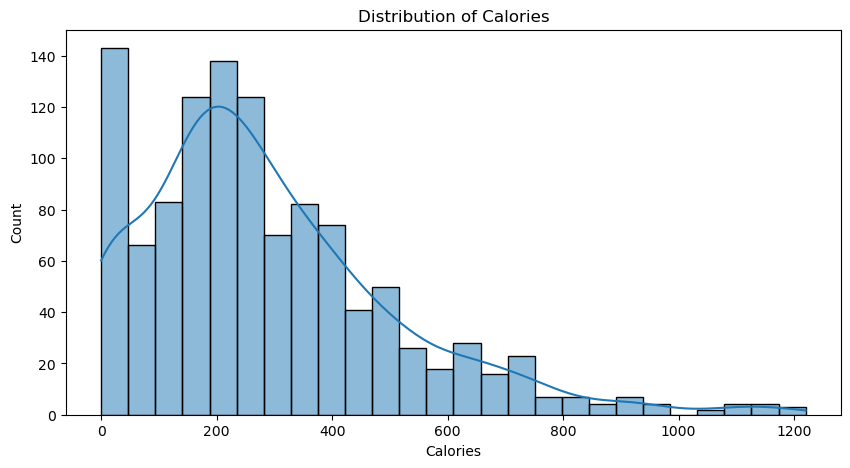

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(df["Calories"], kde=True)
plt.title("Distribution of Calories")
plt.xlabel("Calories")
plt.ylabel("Count")
plt.show()

### 🧈Distribution of Total Fat
Analyzing the distribution of total fat helps us understand how much fat is present across different food items in the dataset.A histogram helps visualize the number of items falling into specific fat ranges.

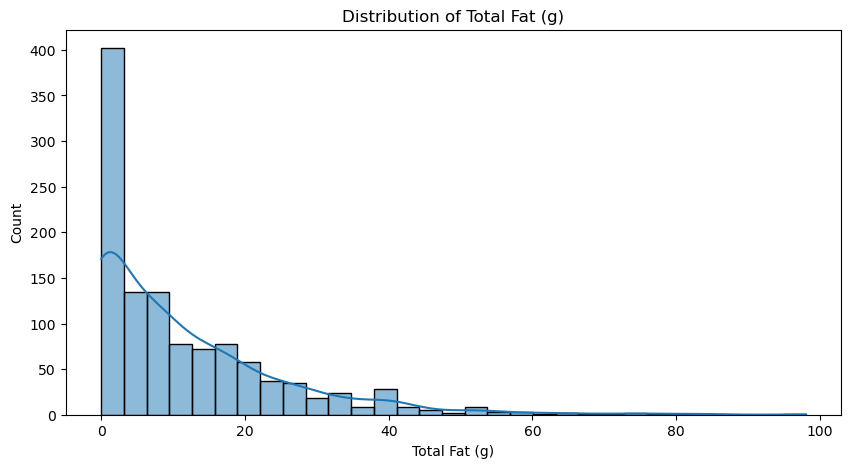

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(df["Total Fat (g)"], kde=True)
plt.title("Distribution of Total Fat (g)")
plt.xlabel("Total Fat (g)")
plt.ylabel("Count")
plt.show()

### 🧈Distribution of Saturated Fat
Understanding the distribution of saturated fat helps reveal how fatty different food items are across the dataset.A histogram is useful for visualizing the frequency of various saturated fat levels

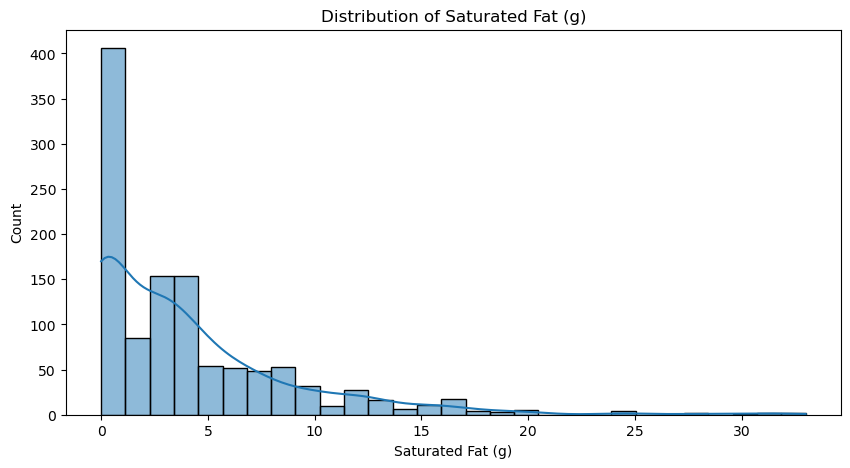

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(df["Saturated Fat (g)"], kde=True)
plt.title("Distribution of Saturated Fat (g)")
plt.xlabel("Saturated Fat (g)")
plt.ylabel("Count")
plt.show()

### 🫀 Distribution of Cholesterol
Understanding the distribution of cholesterol values helps identify how cholesterol levels vary across different food items in the dataset.A histogram shows the frequency of cholesterol values across various ranges.

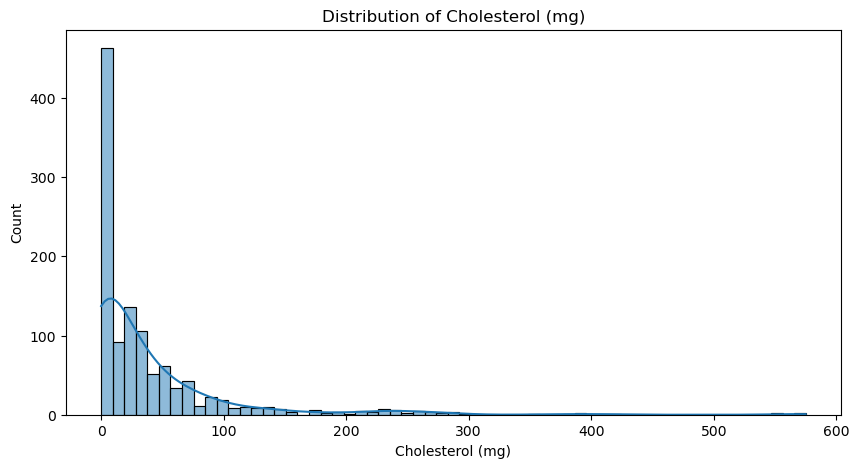

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(df["Cholesterol (mg)"], kde=True)
plt.title("Distribution of Cholesterol (mg)")
plt.xlabel("Cholesterol (mg)")
plt.ylabel("Count")
plt.show()

### 🍞 Distribution of Carbohydrates
Understanding how carbohydrate levels vary across food items is important for analyzing energy content and dietary impact. A histogram displays how often different carbohydrate ranges occur in the dataset.

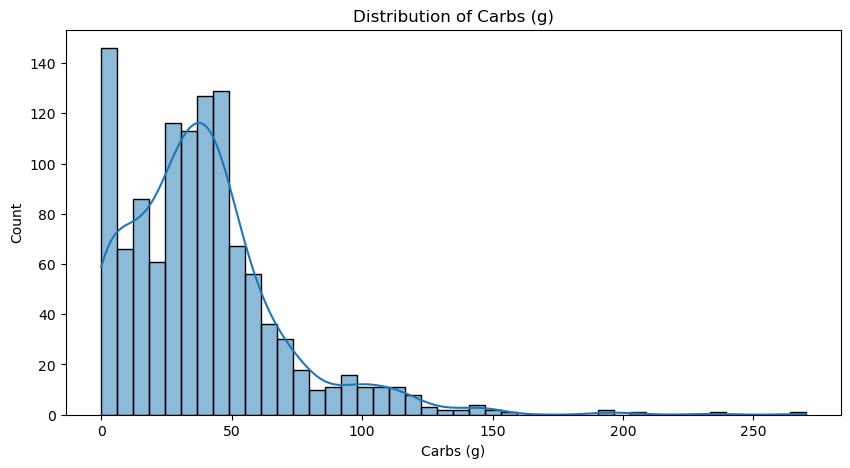

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(df["Carbs (g)"], kde=True)
plt.title("Distribution of Carbs (g)")
plt.xlabel("Carbs (g)")
plt.ylabel("Count")
plt.show()

### 🍬 Distribution of Sugars
Analyzing the distribution of sugar content helps reveal how sweet or sugar-dense different food items are. A histogram displays how frequently various sugar levels appear in the dataset.

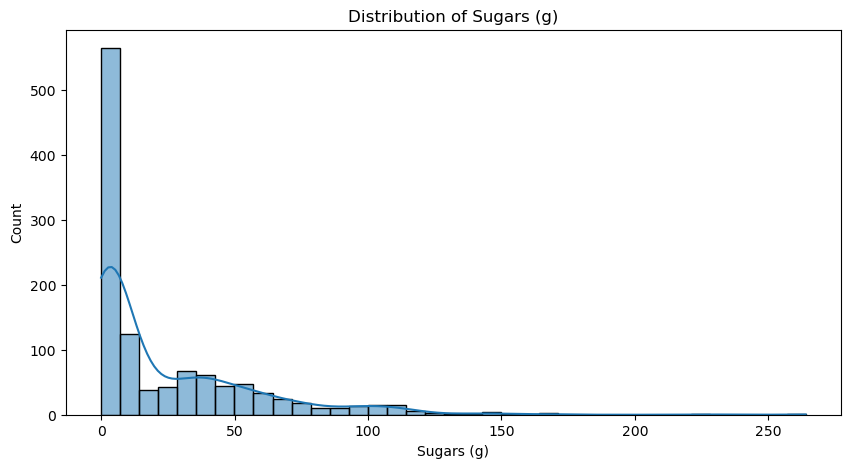

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(df["Sugars (g)"], kde=True)
plt.title("Distribution of Sugars (g)")
plt.xlabel("Sugars (g)")
plt.ylabel("Count")
plt.show()

### 🌾 Distribution of Fiber
Understanding the distribution of fiber content helps us see how much dietary fiber different food items contain.A histogram visualizes the frequency of items across different fiber ranges.

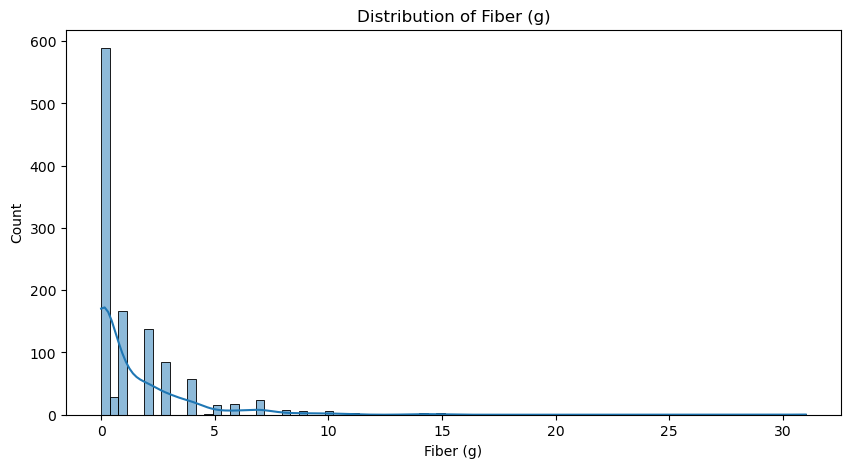

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(df["Fiber (g)"], kde=True)
plt.title("Distribution of Fiber (g)")
plt.xlabel("Fiber (g)")
plt.ylabel("Count")
plt.show()

### 🧂 Distribution of Sodium
Sodium content is a key nutritional factor, especially in fast food items where salt levels can vary widely. A histogram helps visualize how frequently different sodium levels occur.

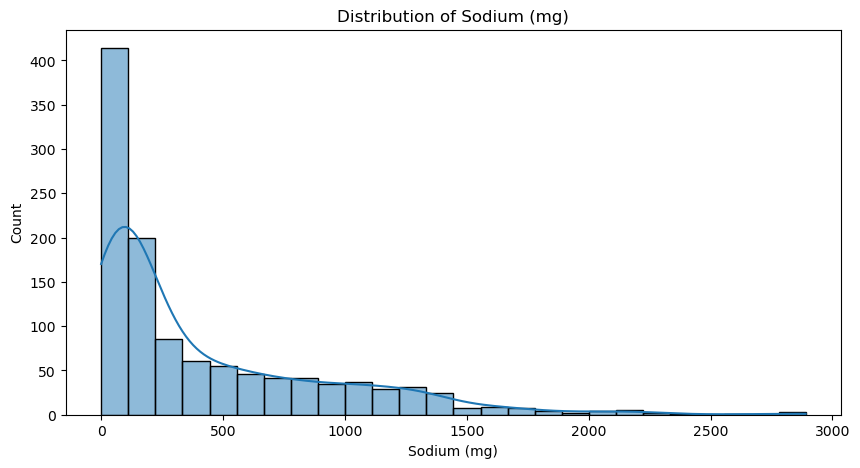

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(df["Sodium (mg)"], kde=True)
plt.title("Distribution of Sodium (mg)")
plt.xlabel("Sodium (mg)")
plt.ylabel("Count")
plt.show()

### 🥩 Distribution of Protein
Understanding the distribution of protein content helps assess how much nutritional value different food items provide. A histogram shows how frequently various protein levels occur across the dataset

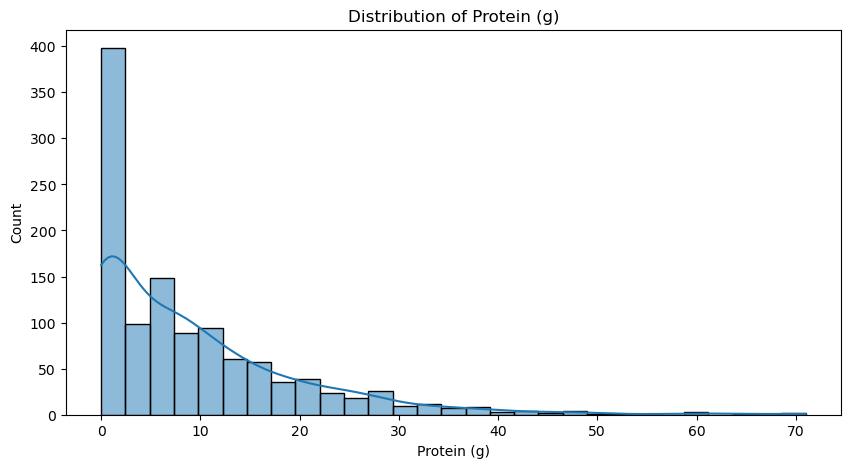

In [25]:
plt.figure(figsize=(10,5))
sns.histplot(df["Protein (g)"], kde=True)
plt.title("Distribution of Protein (g)")
plt.xlabel("Protein (g)")
plt.ylabel("Count")
plt.show()

### 🏢Number of Items per Company
Understanding how many menu items each company contributes to the dataset helps establish the distribution of data across different fast-food chains. A countplot is useful for visualizing the frequency of items for each company

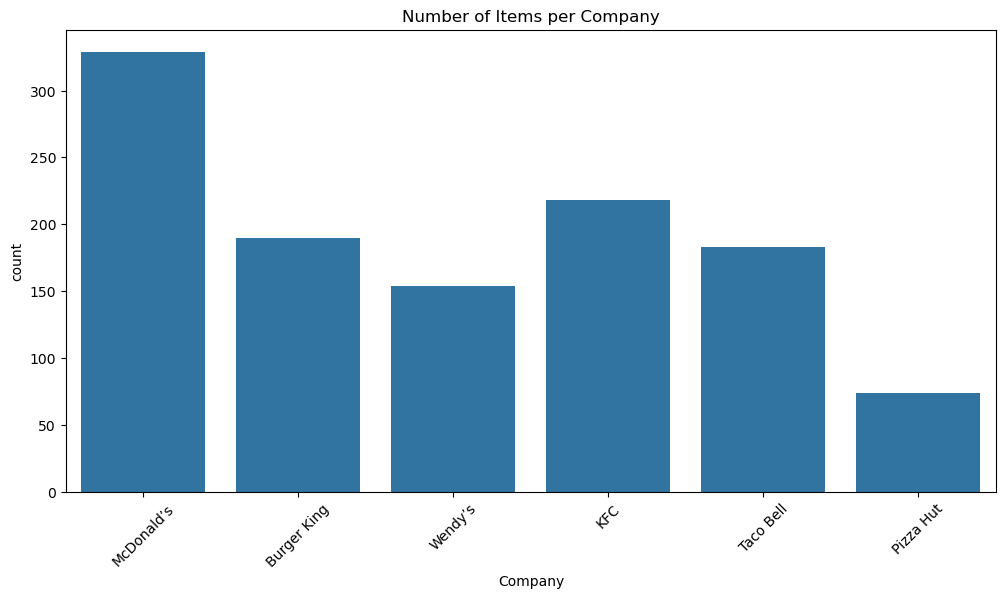

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Company")
plt.title("Number of Items per Company")
plt.xticks(rotation=45)
plt.show()

### 🌾 Fiber Levels Across Categories
A box plot is a powerful visualization for comparing how fiber content varies across different categories such as Low, Mid, and High fiber groups.

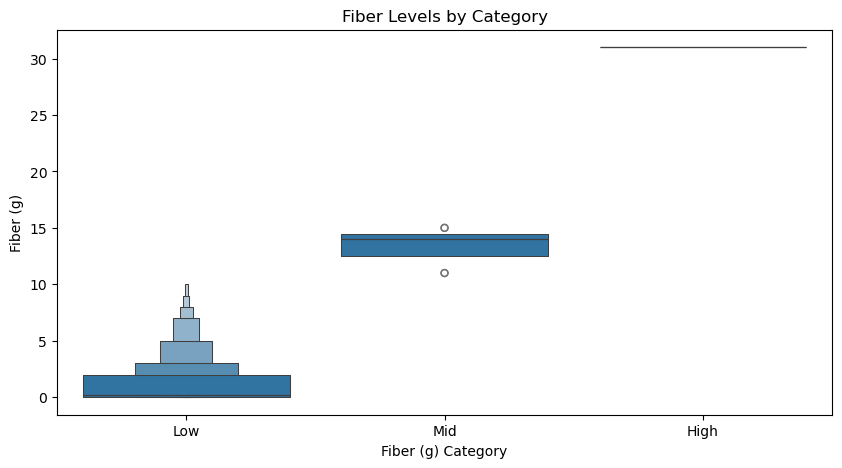

In [27]:
plt.figure(figsize=(10,5))
sns.boxenplot(data=df, x="Fiber (g) Category", y="Fiber (g)")
plt.title("Fiber Levels by Category")
plt.xlabel("Fiber (g) Category")
plt.ylabel("Fiber (g)")
plt.show()

### 🧂 Distribution of Sodium Levels Across Categories
A boxen plot (also called a letter-value plot) is an extension of the traditional box plot and is particularly useful for visualizing large datasets. It provides a more detailed summary of the distribution by breaking the data into multiple quantiles.

This visualization helps you understand how sodium levels vary across Low, Mid, and High sodium categories.

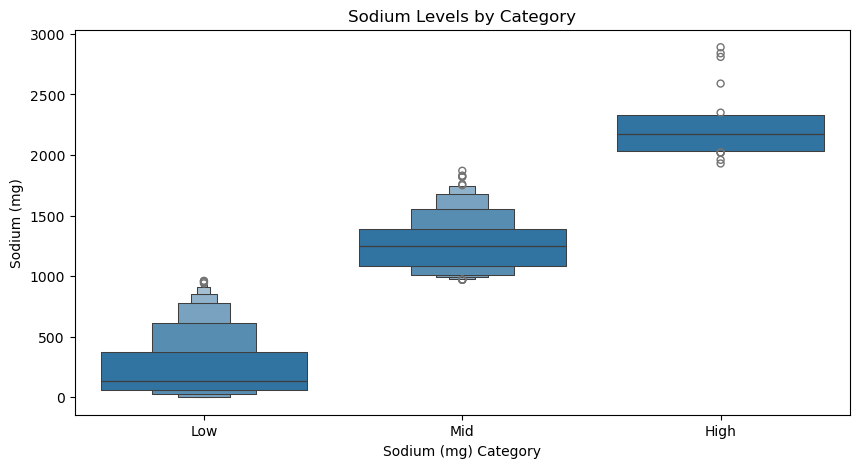

In [28]:
plt.figure(figsize=(10,5))
sns.boxenplot(data=df, x="Sodium (mg) Category", y="Sodium (mg)")
plt.title("Sodium Levels by Category")
plt.xlabel("Sodium (mg) Category")
plt.ylabel("Sodium (mg)")
plt.show()

### 🍗 Protein Levels Across Categories
A strip plot is useful for visualizing the distribution of individual data points within each category. In this case, the plot shows how protein content varies across Low, Mid, and High protein categories.

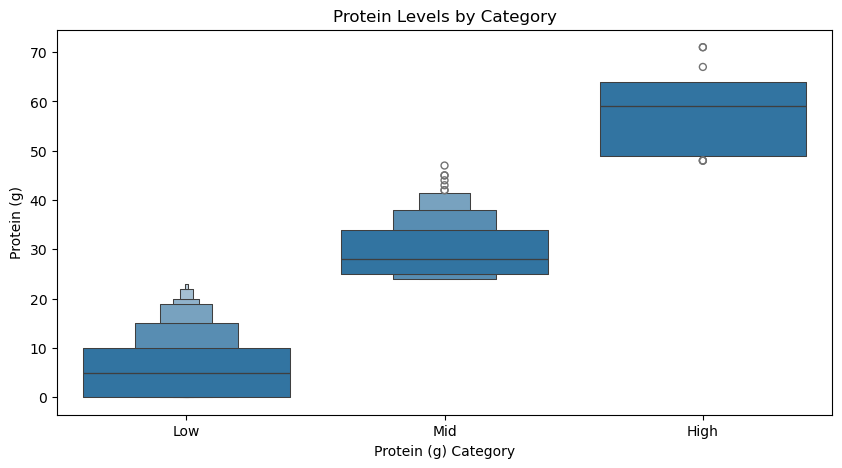

In [29]:
plt.figure(figsize=(10,5))
sns.boxenplot(data=df, x="Protein (g) Category", y="Protein (g)")
plt.title("Protein Levels by Category")
plt.xlabel("Protein (g) Category")
plt.ylabel("Protein (g)")
plt.show()


## Bivariate Analysis
Bivariate analysis studies the relationship between two variables at a time. It reveals how one feature influences or interacts with another.

### 🔥 Average Calories per Company
A heatmap is an excellent tool for visualizing aggregated numerical values across categories. In this case, it shows the average calories offered by each company, helping us compare calorie levels across different fast-food chains.

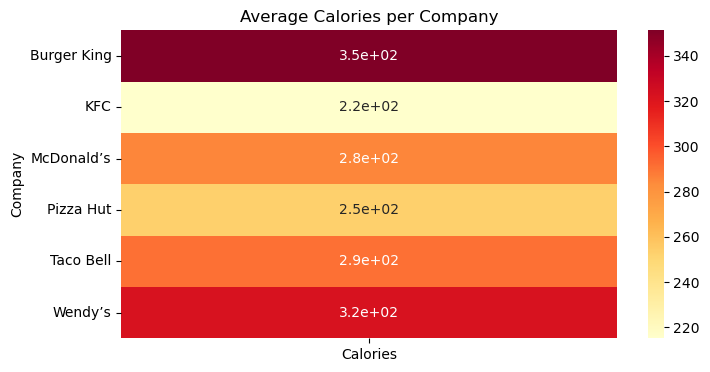

In [30]:
pivot = df.pivot_table(values="Calories", index="Company", aggfunc="mean")

plt.figure(figsize=(8,4))
sns.heatmap(pivot, annot=True, cmap="YlOrRd")
plt.title("Average Calories per Company")
plt.show()

### 🍽️ Calorie Categories by Company
This visualization compares how different companies distribute their menu items across Low, Mid, and High calorie categories. Using a countplot with a hue (Calories Category) allows us to clearly see:

How many menu items each company offers

Which calorie category dominates for each company

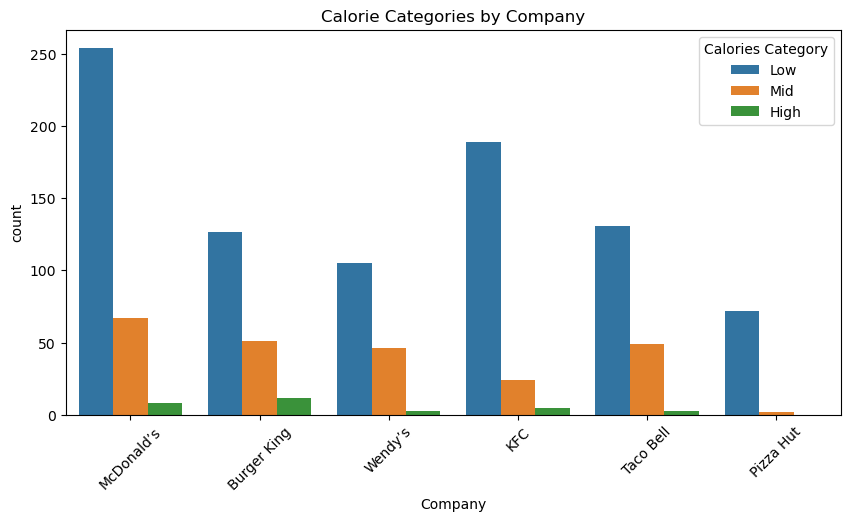

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Company", hue="Calories Category")
plt.title("Calorie Categories by Company")
plt.xticks(rotation=45)
plt.show()

### 🧈 Fat Categories by Company
This countplot shows how different companies distribute their menu items across Low, Mid, and High fat categories. By adding a hue for Total Fat (g) Category, this visualization clearly highlights how fat levels vary among companies.

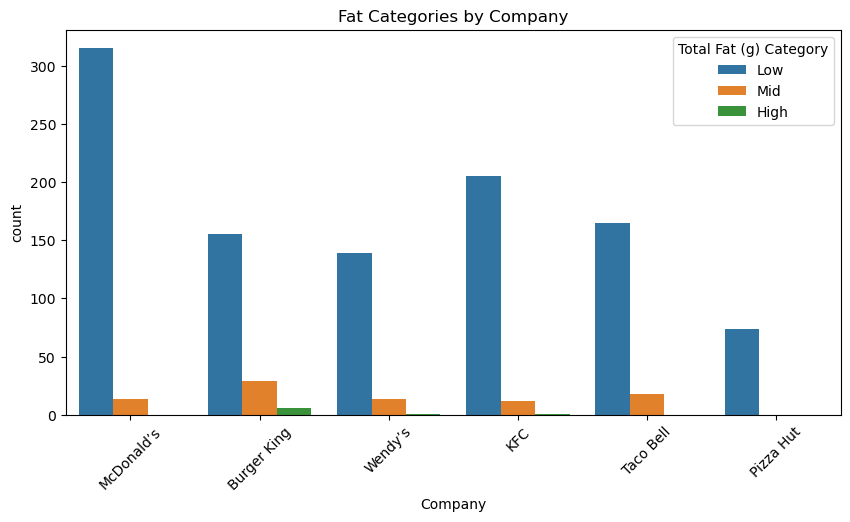

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Company", hue="Total Fat (g) Category")
plt.title("Fat Categories by Company")
plt.xticks(rotation=45)
plt.show()

### 🍞 Carbohydrate Categories by Company
This countplot visualizes how different companies distribute their menu items across Low, Mid, and High carbohydrate categories

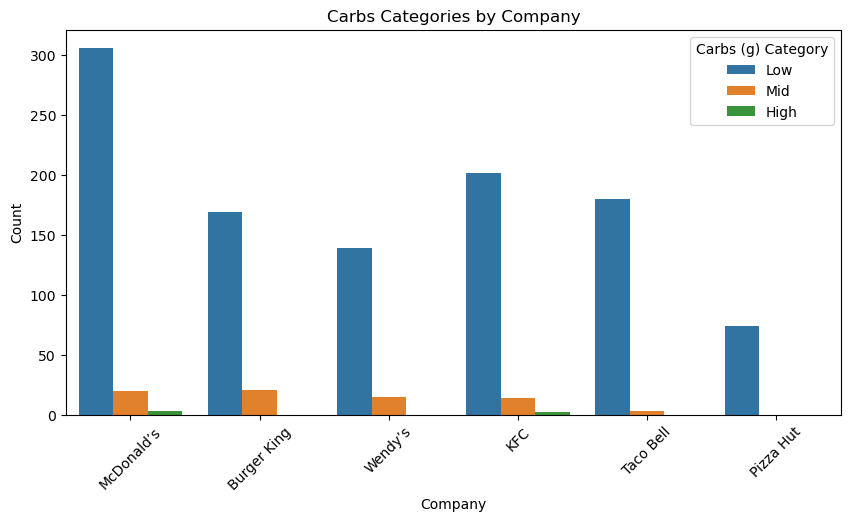

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Company", hue="Carbs (g) Category")
plt.title("Carbs Categories by Company")
plt.xlabel("Company")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### 🍬 Sugar Categories by Company
This countplot shows how different companies distribute their menu items across Low, Mid, and High sugar categories.

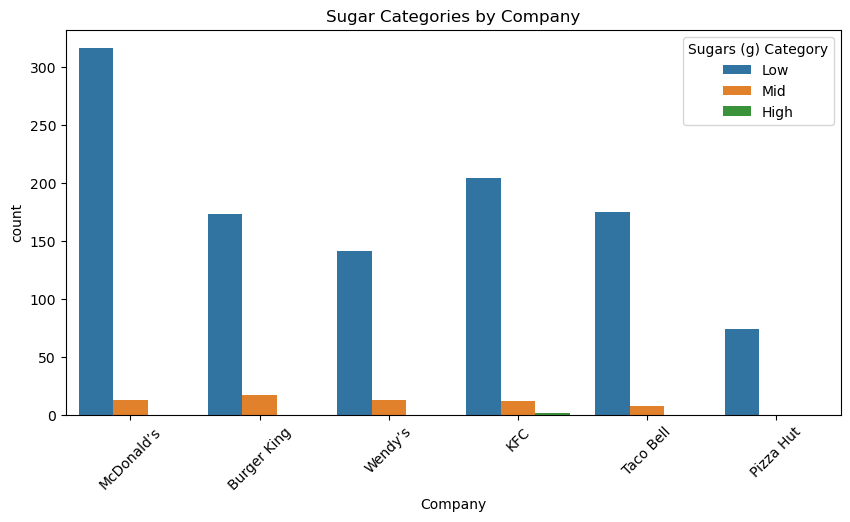

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Company", hue="Sugars (g) Category")
plt.title("Sugar Categories by Company")
plt.xticks(rotation=45)
plt.show()

### 🔍 Relationship Between Total Fat and Calories
A scatter plot is a useful visualization for analyzing the relationship between two continuous variables. In this case, the plot shows how Total Fat (g) relates to Calories across different menu items, with each point colored by company.

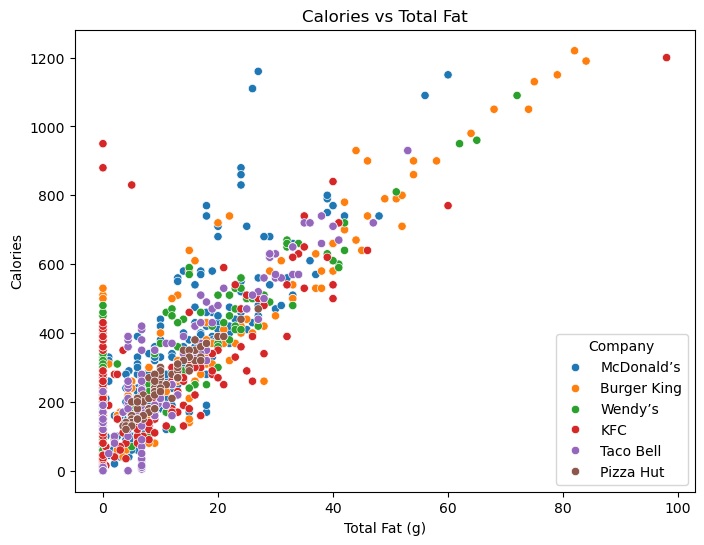

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Total Fat (g)", y="Calories", hue="Company", data=df)
plt.title("Calories vs Total Fat")
plt.show()

### 🍽️ Average Calories by Food Category
This horizontal bar chart visualizes the average calorie content for each food category in the dataset. Using a horizontal layout makes it easier to compare categories, especially when category names are long or numerous.

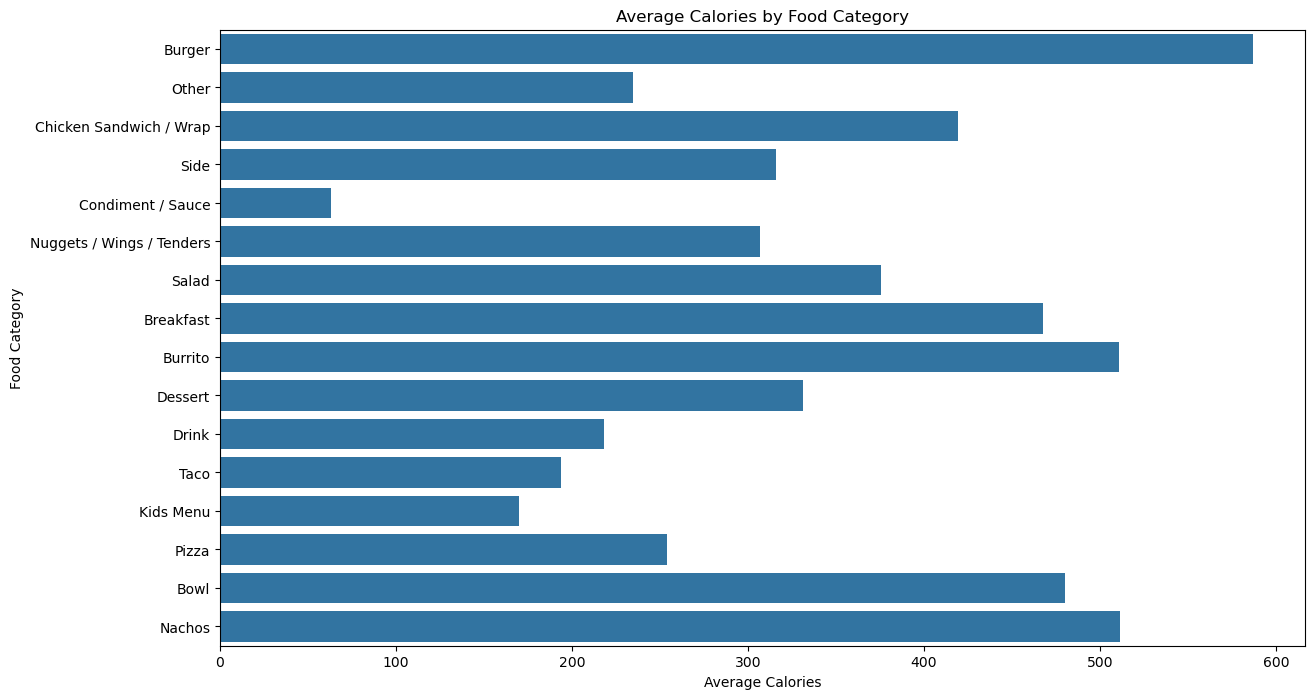

In [36]:
plt.figure(figsize=(14,8))
sns.barplot(y="Category", x="Calories", data=df, estimator=np.mean, errorbar=None)
plt.title("Average Calories by Food Category")
plt.xlabel("Average Calories")
plt.ylabel("Food Category")
plt.show()

### 🌾 Fiber Levels Across Companies
A boxen plot (letter‐value plot) is an enhanced version of a box plot designed to show detailed distribution information, especially in larger datasets. This visualization compares Fiber (g) levels across different companies to help reveal variations in nutritional composition.

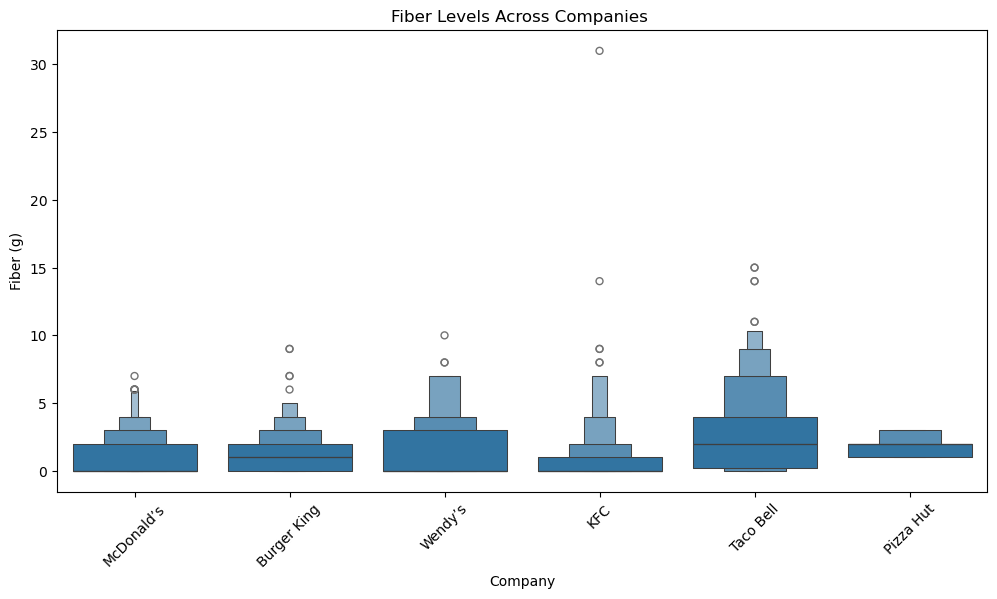

In [37]:
plt.figure(figsize=(12,6))
sns.boxenplot(x="Company", y="Fiber (g)", data=df)
plt.title("Fiber Levels Across Companies ")
plt.xticks(rotation=45)
plt.show()

### 🧂 Sodium Levels Across Companies
A boxen plot (letter-value plot) is an enhanced version of a traditional box plot. It is especially useful for larger datasets because it displays multiple quantiles, offering a more detailed view of the distribution.

In this visualization, the boxen plot compares Sodium (mg) levels across different companies.

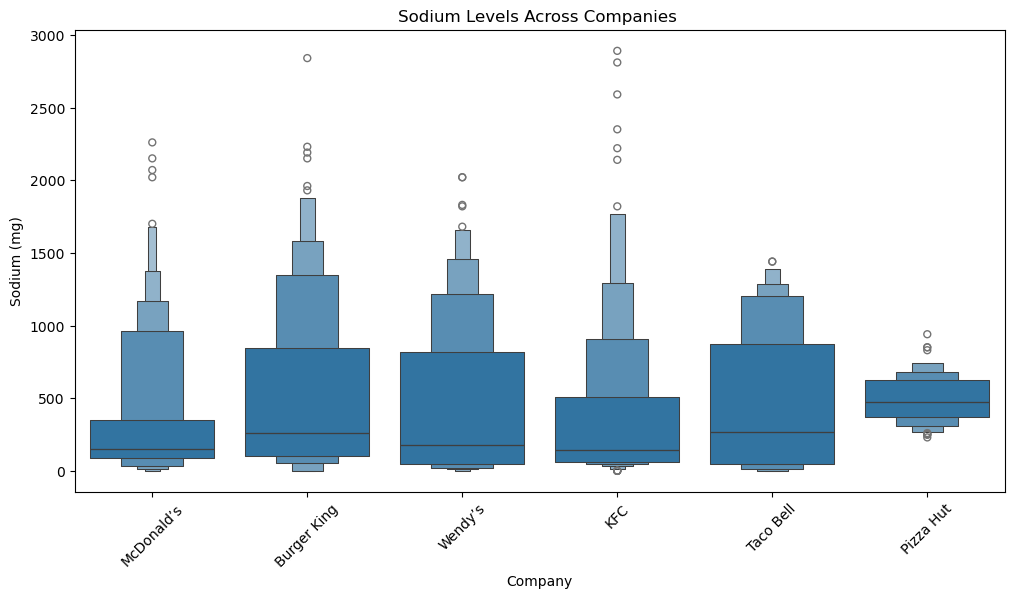

In [38]:
plt.figure(figsize=(12,6))
sns.boxenplot(x="Company", y="Sodium (mg)", data=df)
plt.title("Sodium Levels Across Companies ")
plt.xticks(rotation=45)
plt.show()

### 🥩 Protein Levels Across Companies
A boxen plot (letter-value plot) offers a detailed look at how protein content varies across different companies. It expands on the traditional boxplot by showing more quantiles, making it ideal for identifying subtle patterns in larger datasets.

This visualization allows us to observe which companies tend to offer higher-protein menu items and variability of protein content within each company.

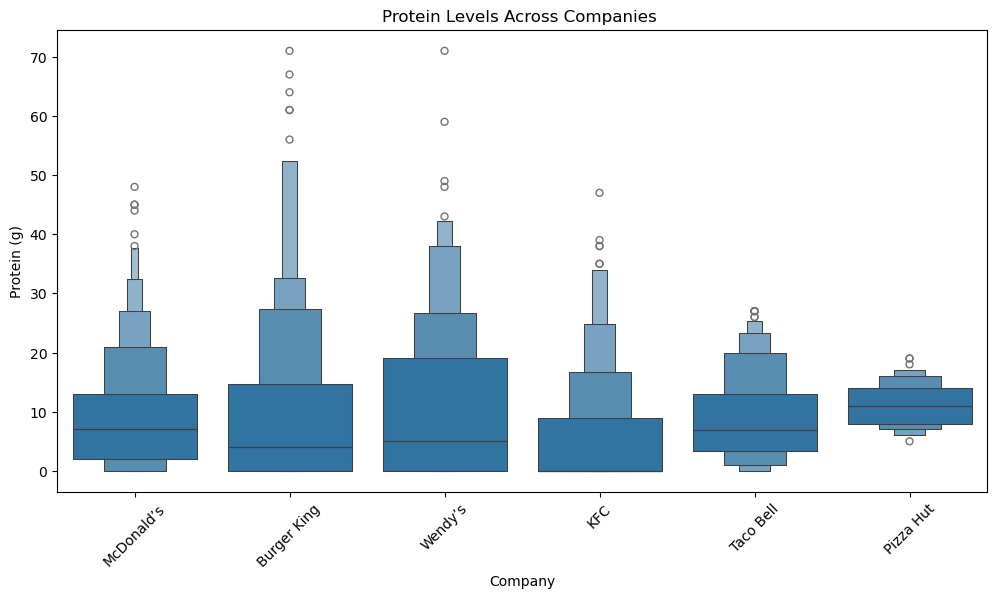

In [39]:
plt.figure(figsize=(12,6))
sns.boxenplot(x="Company", y="Protein (g)", data=df)
plt.title("Protein Levels Across Companies ")
plt.xticks(rotation=45)
plt.show()


### ⭐ Average Weight Watchers Points by Company
A point plot is ideal for visualizing the average value of a numerical variable across different categorical groups. In this case, the plot shows the average Weight Watchers Points assigned to menu items for each company.

Weight Watchers Points provide a combined measure of calories, fat, fiber, and protein — making this visualization useful for comparing the overall healthiness of menu items from different fast-food brands.

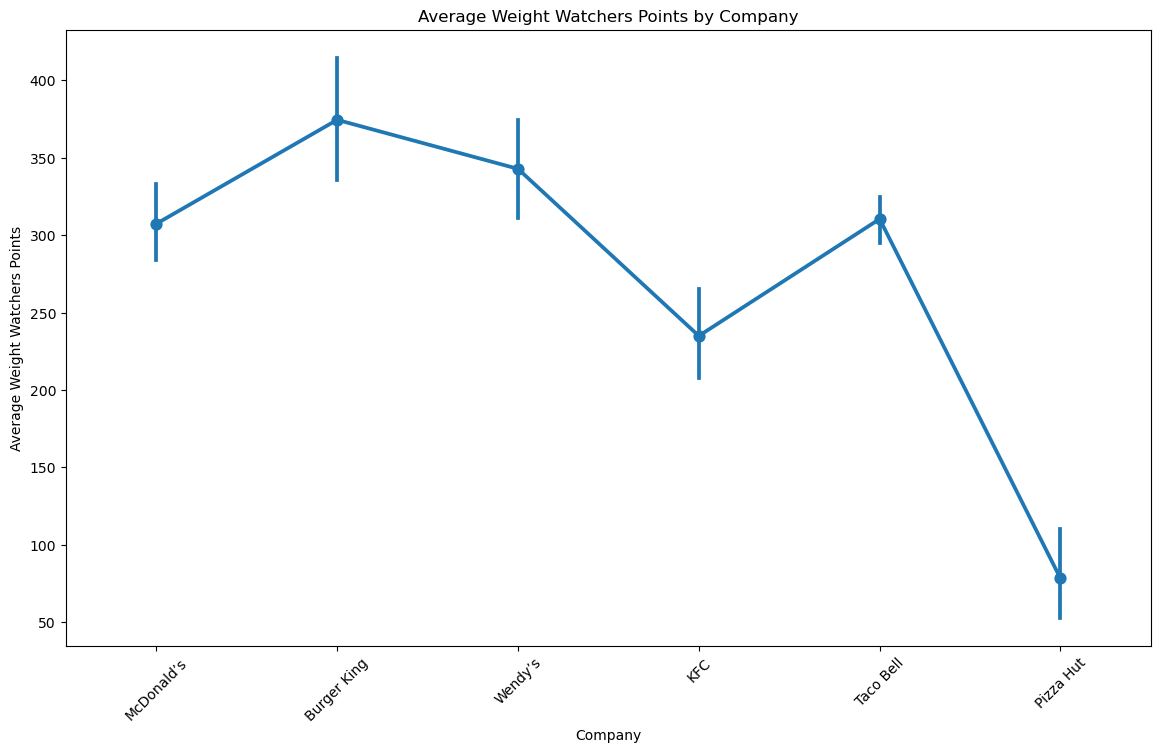

In [40]:
plt.figure(figsize=(14,8))
sns.pointplot(x="Company", y="Weight Watchers Pnts", data=df, errorbar=("ci", 95))
plt.title("Average Weight Watchers Points by Company")
plt.xlabel("Company")
plt.ylabel("Average Weight Watchers Points")
plt.xticks(rotation=45)
plt.show()

## Multivariate Analysis
Multivariate analysis examines interactions among three or more variables simultaneously. It reveals complex patterns not visible in univariate or bivariate analysis.

### 🔥 Nutritional Feature Correlation Matrix
A correlation heatmap is a powerful tool for identifying relationships between numerical variables. In this visualization, only numerical nutritional features are selected (e.g., Calories, Fat, Sodium, Carbs, Sugars, Protein, etc.), and their pairwise correlations are calculated.

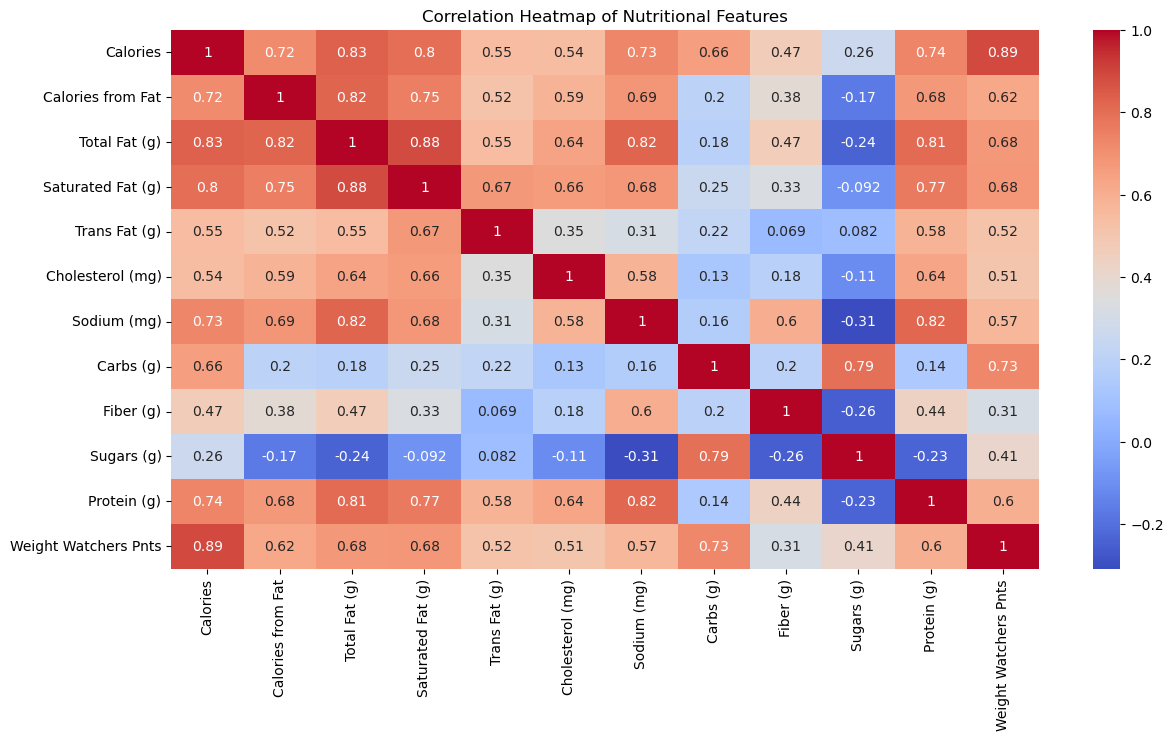

In [41]:
plt.figure(figsize=(14,7))
sns.heatmap(df.select_dtypes(include="float64").corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Nutritional Features")
plt.show()

### 🔍Multivariate Relationship Analysis of Nutritional Features
A pairplot provides a comprehensive multivariate visualization by generating scatterplots for every pair of numerical variables along with histograms of individual features. Using a hue for Company makes it possible to compare nutrient relationships across different fast-food brands.

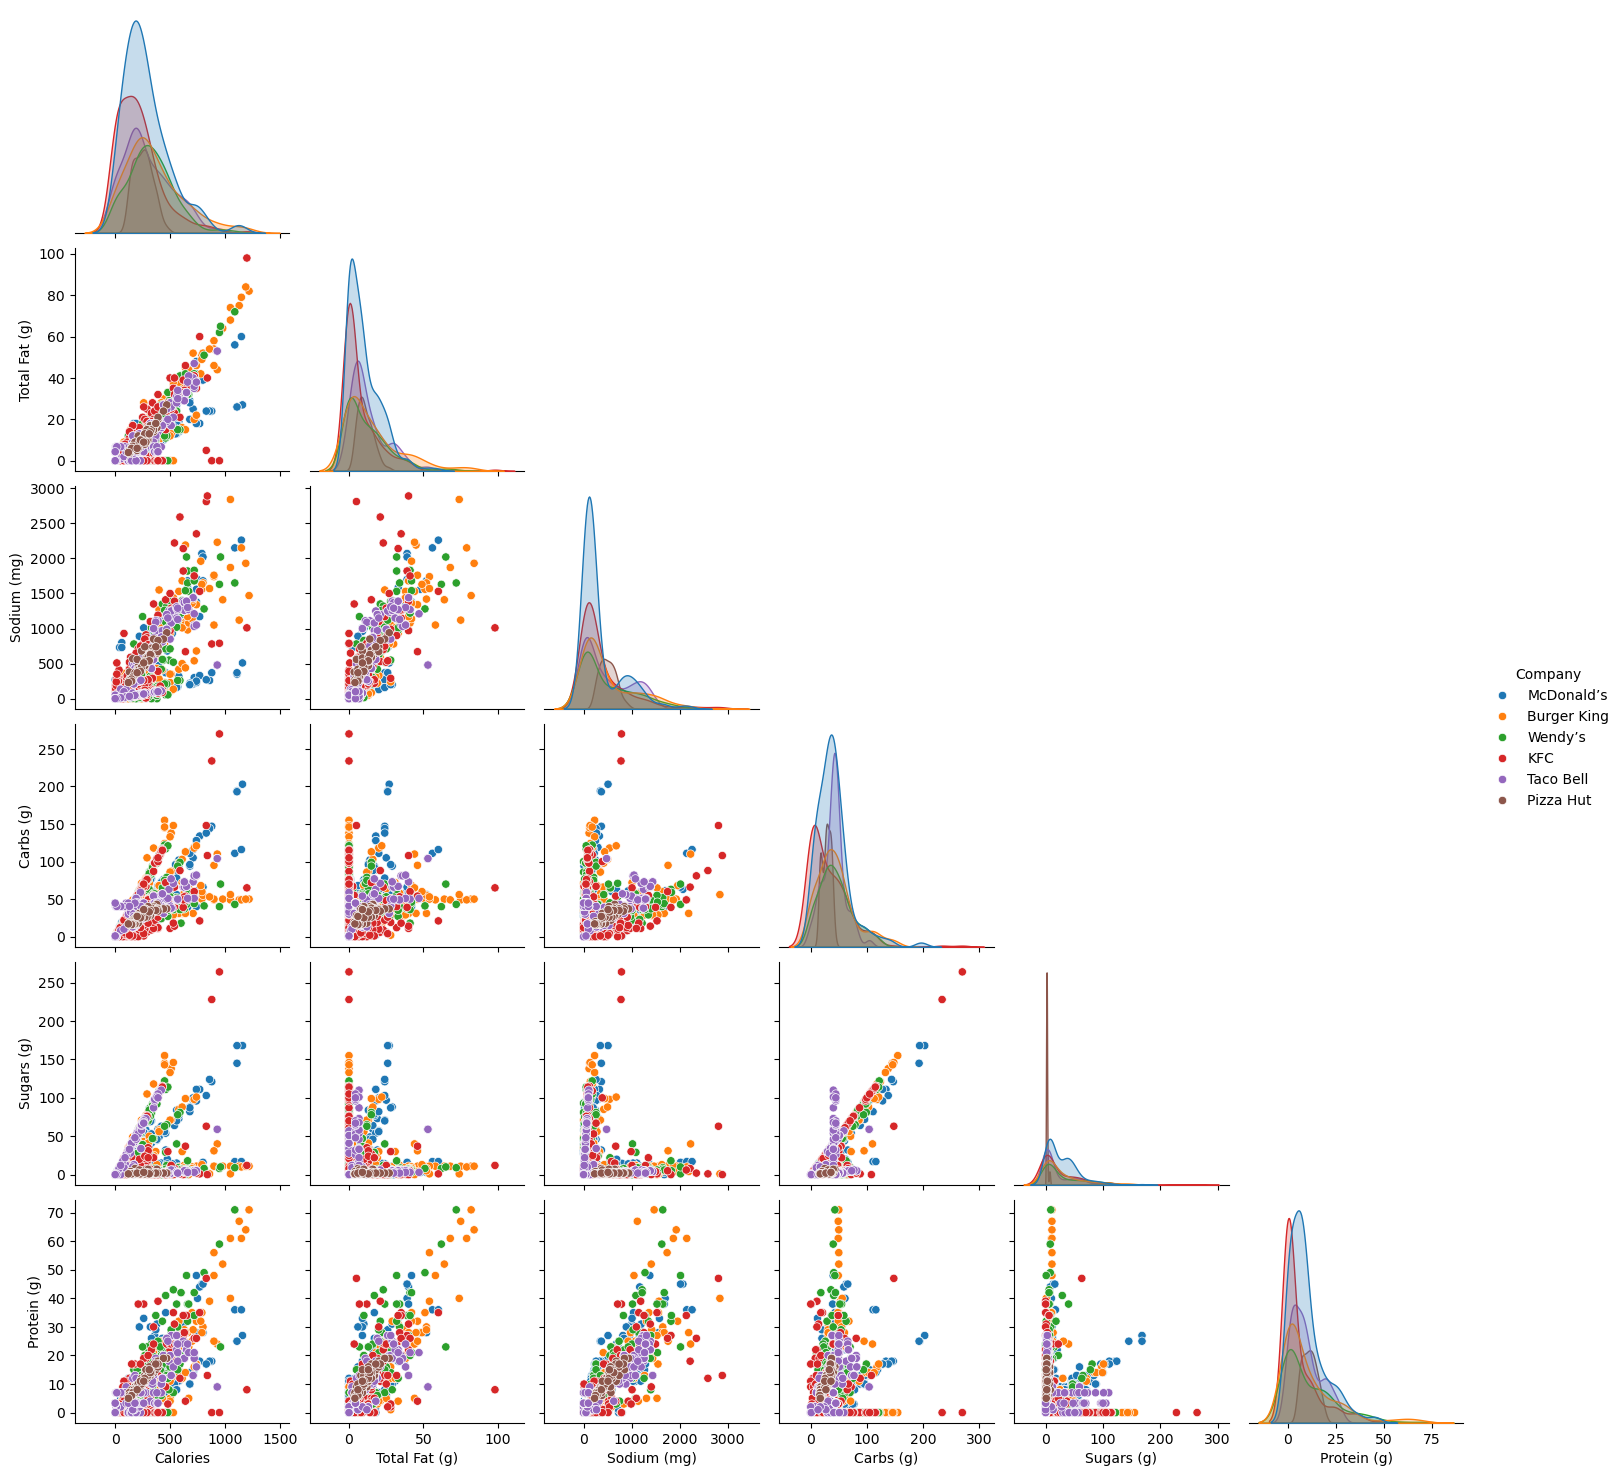

In [42]:
sns.pairplot(
    df,
    vars=[
        "Calories",
        "Total Fat (g)",
        "Sodium (mg)",
        "Carbs (g)",
        "Sugars (g)",
        "Protein (g)"
    ],
    hue="Company",
    corner=True
)
plt.show()

### 🍽️ Average Nutritional Values Across Companies
This grouped bar chart provides a clear comparison of average nutritional values across different fast-food companies.Because the chart displays multiple nutrients simultaneously, it provides an excellent high-level comparison of nutritional composition across companies.

<Figure size 1800x1000 with 0 Axes>

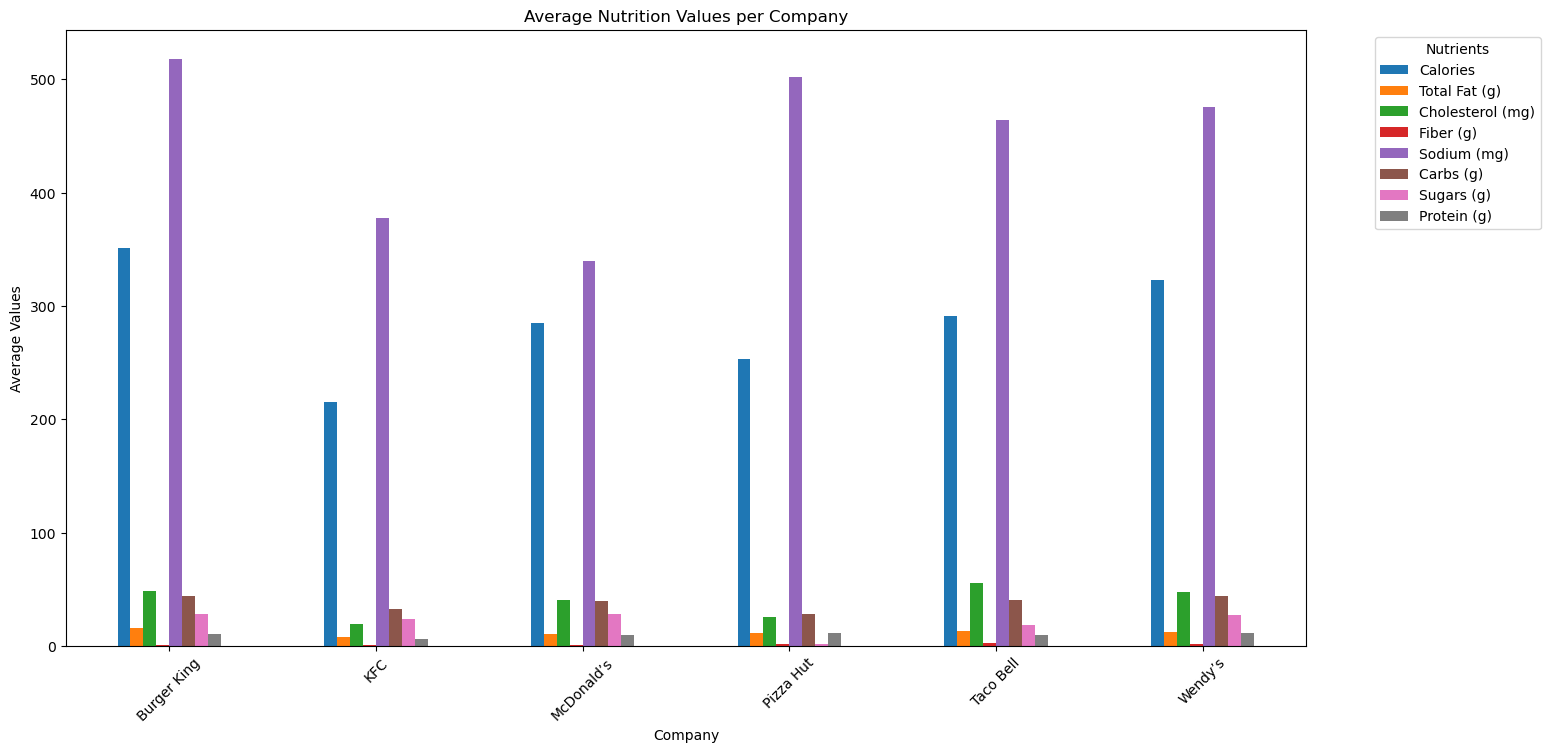

In [43]:
nutrient_cols = [
    "Calories",
    "Total Fat (g)",
    "Cholesterol (mg)",
    "Fiber (g)",
    "Sodium (mg)",
    "Carbs (g)",
    "Sugars (g)",
    "Protein (g)"
]
grouped = df.groupby("Company")[nutrient_cols].mean()

# Plot grouped bar chart
plt.figure(figsize=(18,10))
grouped.plot(kind="bar", figsize=(16,8))
plt.title("Average Nutrition Values per Company")
plt.ylabel("Average Values")
plt.xlabel("Company")
plt.xticks(rotation=45)
plt.legend(title="Nutrients", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
